# COGS 118A - Project Checkpoint

# Names

- Neil Bajaj
- Pratheek Sankeshi
- Shenova Davis
- Ria Singh


# Abstract 
The goal of this project is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. We will predict using a machine learning algorithm. The data we will be using is from the Kaggle dataset: A Credit Card Dataset for Machine Learning. The link is https://www.kaggle.com/datasets/caesarmario/application-data/. We will be using factors such as Total Income, Education Type, Applicant Age, etc. More will be described in the data section. Furthermore, we will drop unnecessary columns like Owned Phone, Owned Email, etc while also replacing null values to perform EDA. We will then run various supervised machine learning algorithms to create models to predict the data and use the best one. The performance will be measured on how accurately we predict the data against the status column of the data which is whether the application was approved or not. 


# Background

As we get deeper into the age of Big Data, we see that, where possible, we are attempting to move from human evaluation to machine learning prediction. There has also been an uptick in the number of credit card defaulters. Using this logic, credit card companies need a new way to decide whether or not to approve credit cards based on prior history. 

A previous study done by Dr. Hemkiran[1] evaluated whether applicants should be approved for a credit card by using a Logistic Regression with and without a grid search technique. They found that using a grid search technique improved the competency of their model. Additionally, they also used an Artificial Neural Network (ANN) and found it to be better than the linear regression model. Another study by Dr. Kibria[2] aimed to create a deep learning model to aid credit card approval decision-making. They also used a logistic regression model and a support vector machine (SVM) model to compare their results. They found that the deep learning model was better than the logistic regression and SVM models. However, the ANN model and deep learning model are more computationally expensive and time-consuming. 

We are attempting to create a predictive machine learning model that models whether or not the application has the right credentials to have their credit card application approved using the following variables: Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, and Family Status. This is to avoid future credit card defaulters. We will use models such as Naive Bayes Classifier, Linear SVM, and Linear Regression and use them to compare our model’s performance as well. 


# Problem Statement

We are building this model to measure if there are any discrepancies when approving credit card applications. We additionally want to check if we could use big data and machine learning to build a model that predicts if a credit card is approved or not. This would take out human bias from the equation and make sure every application is fairly reviewed. Creating a machine learning model will attempt to eliminate the human bias towards race, class, gender, etc - an issue that plagues the financial ratings of individuals. Additionally, a machine-learning system can significantly reduce the human power and costs of a credit card company, increasing revenue. If our model can accurately predict whether an application can be accepted, we could conclude our hypothesis. This problem is quantifiable since we are trying to model a binary predictor. This problem is measurable because we would be using the metric of accuracy to validate the performance of our model. Lastly, our model is replicable because we could run it on different datasets and check its accuracy on each dataset. The model we will create will be composed of supervised machine-learning algorithms and techniques such as logistic regression, linear SVM, K fold validation, etc. We will train our model on previously collected data from credit card companies to understand what attributes make an individual more or less likely to get approved for a credit card. 


# Data


- Link for our data: https://www.kaggle.com/datasets/caesarmario/application-data

- This data set has about 25,100 observations with 21 variables. 

- The variables that will be used are Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, and Family Status. 

- The dataset we are using has already been cleaned to drop any data points with null values and yet the dataset remains robust so we will not be addressing it any further.

- We will additionally drop all the features that we will not be using to further declutter the dataset.

- In addition to cleaning we one hot encoded all other categorical data which wasn't already binary which is displayed below



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
from matplotlib.pyplot import figure
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#models importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

#linear svm stuff
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.kernel_ridge import KernelRidge

In [2]:
credit  = pd.read_csv('Application_Data.csv')
credit.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [3]:
status = credit['Status']
status_0_len = len(status[status==0])
status_1_len = len(status[status==1])
print(status_0_len/len(status))

0.004815345431391276


In [4]:
#note: we noticed here that the datset mainly leading to approving the credit card, we cannot use a regualr model
# because the best one would be just approving the credit card application every time. 

#we need to find a model that takes care of imbalanced data and looking fo that we found pyCaret. 
#we could also use scikit learn for this. 

#SMOTE
#ADASYN

'''
MODELS TO USE 
- LOGISTIC REGRESSION / CLASSIFIER 
- ADA BOOST 
- GRADIENT BOOST 
- RANDOM FOREST 
- SVM ?
'''

'\nMODELS TO USE \n- LOGISTIC REGRESSION / CLASSIFIER \n- ADA BOOST \n- GRADIENT BOOST \n- RANDOM FOREST \n- SVM ?\n'

In [5]:
credit.dtypes

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
Status                   int64
dtype: object

In [6]:
#first we will only keep columns that we need. These columns are covered under Data along with 
#status which says whether or not it was approved
credit = credit[["Applicant_Gender", "Applicant_Age","Owned_Realty",
                 "Total_Children", "Owned_Car", "Total_Income", "Housing_Type",
                 "Total_Family_Members", "Education_Type", "Family_Status", 'Status', 'Total_Bad_Debt', 'Total_Good_Debt']]

In [7]:
credit.dtypes

Applicant_Gender        object
Applicant_Age            int64
Owned_Realty             int64
Total_Children           int64
Owned_Car                int64
Total_Income             int64
Housing_Type            object
Total_Family_Members     int64
Education_Type          object
Family_Status           object
Status                   int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Train Test Split since its a large dataset idk about this one shud explain this better than we did

X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1), #
                                                    credit['Status'], #Y variable target
                                                    train_size=0.8,
                                                    random_state=123)
categorical_features = ["Applicant_Gender", "Housing_Type", "Education_Type", "Family_Status"]

In [10]:
#THE CODE IN THE CELL BELOW USES SMOTE TO FIX DATA IMBALANCES 
# OUR DATAPOINTS WENT FROM 20K IN THE TRAINSET TO 40K IN THE TRAINSET 
#we have shifted our status to the y_test and y_train because that is what we are going to compare with 

In [11]:
X_train.dtypes #showing what the different columns are

Applicant_Gender        object
Applicant_Age            int64
Owned_Realty             int64
Total_Children           int64
Owned_Car                int64
Total_Income             int64
Housing_Type            object
Total_Family_Members     int64
Education_Type          object
Family_Status           object
Total_Bad_Debt           int64
Total_Good_Debt          int64
dtype: object

In [12]:
from imblearn.over_sampling import SMOTE


from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

# Define one-hot encoder and scaler
numerical_transformer = StandardScaler()
#categorical_transformer = OneHotEncoder(drop='if_binary')  # drop original categorical features if binary (applicant_gender)

categorical_transformer = OneHotEncoder(drop='first')  # drop original categorical features, could combine with if binary
#but unnecessary




#creating a preprocessor to add to the pipeline maybe combine this cell into one?
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])



In [13]:
X_train.head()

,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Housing_Type,Total_Family_Members,Education_Type,Family_Status,Total_Bad_Debt,Total_Good_Debt
21319,M,52,0,0,0,112500,House / apartment ...,2,Secondary / secondary special ...,Married ...,0,12
21048,M,35,0,1,0,135000,House / apartment ...,3,Secondary / secondary special ...,Married ...,0,17
15222,M,31,1,1,1,157500,House / apartment ...,3,Secondary / secondary special ...,Married ...,2,18
8330,F,55,0,0,0,135000,With parents ...,1,Secondary / secondary special ...,Single / not married ...,0,40
10931,M,38,0,0,0,180000,House / apartment ...,2,Secondary / secondary special ...,Married ...,0,21


In [14]:
# Drop the columns and apply preprocessor to remaining features
#X_train_processed = preprocessor.fit_transform(X_train, y_train) 
X_train_processed = preprocessor.fit_transform(X_train) #no difference between putting a target or not
'''
The explanation from chatgpt:
It means that the target variable y_train is not used in the preprocessing step, 
so passing it as an argument to fit_transform() or not passing it has no effect on the output 
of X_train_processed. The preprocessor only transforms the features in X_train according to 
the specifications in preprocessor, so the target variable is not needed. However, if you had 
a preprocessor that needed the target variable, then passing it as an argument would be necessary.

'''
#combines teh .fit and .transform step of the ColumnTransformer ^^

#oversample using the smote technique which was recommended on piazza
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_processed, y_train)




In [15]:
X_res.shape #so we managed to drop the original columsn from the data because if we didnt drop the 
#first then it would be x26

(40004, 22)

In [16]:
type(X_train_processed )

numpy.ndarray

In [17]:
#now for the crossvalidation chain we have to convert the X_res which is a numpy drray back into a pandas dataframe
# Convert X_res to a DataFrame
#column_names = preprocessor.get_feature_names() #would have worked if standard scalar didnt have the get_feature_name method

# Get column names for the DataFrame
num_columns = list(numerical_columns)

preprocessor.fit(X_train)

#cat_columns = list(categorical_transformer.get_feature_names_out(categorical_columns))
cat_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
column_names = num_columns + cat_columns
column_names = num_columns + cat_columns

X_res_df = pd.DataFrame(X_res, columns=column_names)

In [18]:
X_res_df['Total_Income'].head()

0   -0.797369
1   -0.578088
2   -0.358807
3   -0.578088
4   -0.139526
Name: Total_Income, dtype: float64

In [19]:
X_res_df['Total_Income'].describe()

count    40004.000000
mean        -0.041293
std          1.006789
min         -1.630637
25%         -0.660573
50%         -0.315613
75%          0.299036
max         13.455899
Name: Total_Income, dtype: float64

In [20]:
X_train['Total_Income'].describe()

count    2.010200e+04
mean     1.943165e+05
std      1.026106e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Total_Income, dtype: float64

In [172]:
'''

The reason why they look different and transformed is due to standard scaling 
Standard scaling (also known as standardization) has several benefits:

Normalization of data: Standard scaling transforms the data to have zero mean and unit variance, which helps in normalizing the data. This is particularly useful when the data has different units of measurement or scales.

Better performance of some machine learning algorithms: Some machine learning algorithms like K-nearest neighbors (KNN) and SVM (support vector machines) are sensitive to the scale of the input features. Standard scaling can improve the performance of these algorithms.

Efficient optimization: Many optimization algorithms like gradient descent converge faster when the input features are on the same scale.

Interpretation of coefficients: When performing linear regression or other models with coefficients, standard scaling ensures that the coefficients can be compared fairly, as they are on the same scale.

Overall, standard scaling is a common preprocessing step that can improve the performance of many machine learning models and make the interpretation of results easier.


Due to the reasons above, I believe we should keep standard scaling

'''

'\n\nThe reason why they look different and transformed is due to standard scaling \nStandard scaling (also known as standardization) has several benefits:\n\nNormalization of data: Standard scaling transforms the data to have zero mean and unit variance, which helps in normalizing the data. This is particularly useful when the data has different units of measurement or scales.\n\nBetter performance of some machine learning algorithms: Some machine learning algorithms like K-nearest neighbors (KNN) and SVM (support vector machines) are sensitive to the scale of the input features. Standard scaling can improve the performance of these algorithms.\n\nEfficient optimization: Many optimization algorithms like gradient descent converge faster when the input features are on the same scale.\n\nInterpretation of coefficients: When performing linear regression or other models with coefficients, standard scaling ensures that the coefficients can be compared fairly, as they are on the same scale.

In [173]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [177]:
# REPEATED K FOLD CROSS VALIDATION 
# 25 FOLDS FOR EACH OF THE 3 CANDIDATES - TOTALLING 75 FITS

# Import here
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

params ={'C':[0.01, 0.05, 10]}
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state = 42)

clf1 = GridSearchCV(LogisticRegression(), params, cv = rkf, n_jobs=-1, verbose = 3)


#i think we have to fit something here
#clf1.fit(X_train, y_train)
clf1.fit(X_res_df, y_res)
# View the Grid Search CV Results
print((clf1.cv_results_))

Fitting 25 folds for each of 3 candidates, totalling 75 fits
{'mean_fit_time': array([0.35520584, 0.53480962, 0.86559887]), 'std_fit_time': array([0.0446156 , 0.02723175, 0.12175941]), 'mean_score_time': array([0.00578008, 0.00564754, 0.00538681]), 'std_score_time': array([0.00127699, 0.0005519 , 0.00184771]), 'param_C': masked_array(data=[0.01, 0.05, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.05}, {'C': 10}], 'split0_test_score': array([0.98950131, 0.992001  , 0.99850019]), 'split1_test_score': array([0.99150106, 0.9936258 , 0.99825022]), 'split2_test_score': array([0.99350081, 0.99612548, 0.99937508]), 'split3_test_score': array([0.99262592, 0.99537558, 0.99900012]), 'split4_test_score': array([0.992625, 0.994   , 0.998625]), 'split5_test_score': array([0.99025122, 0.99400075, 0.99900012]), 'split6_test_score': array([0.99337583, 0.99425072, 0.9983752 ]), 'split7_test_score': array([0.99287589, 0.995

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
X_res = X_res_df

In [31]:
print(type(clf1.cv_results_))

<class 'dict'>


In [32]:
# NORMAL K FOLD CROSS VALIDATION SPLITS =25 


from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV

params = {'C': [0.01, 0.5, 10]}

kf = KFold(n_splits = 25)
clf2 = GridSearchCV(LogisticRegression(), params, cv = kf)

clf2.fit(X_res, y_res)

# View the Grid Search CV Results
print(clf2.cv_results_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'mean_fit_time': array([0.10931808, 0.28320243, 0.29437852]), 'std_fit_time': array([0.01108922, 0.02303357, 0.03196705]), 'mean_score_time': array([0.00062051, 0.00084024, 0.00070312]), 'std_score_time': array([0.0005161 , 0.00036672, 0.00049214]), 'param_C': masked_array(data=[0.01, 0.5, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.5}, {'C': 10}], 'split0_test_score': array([0.9806371 , 0.99250468, 0.99875078]), 'split1_test_score': array([0.98500937, 0.99250468, 0.99625234]), 'split2_test_score': array([0.9868832 , 0.99562773, 0.99875078]), 'split3_test_score': array([0.98625859, 0.99687695, 0.99875078]), 'split4_test_score': array([0.985625, 0.993125, 0.998125]), 'split5_test_score': array([0.981875, 0.99    , 0.995625]), 'split6_test_score': array([0.98125 , 0.991875, 0.99875 ]), 'split7_test_score': array([0.985   , 0.993125, 0.996875]), 'split8_test_score': array([0.98125 , 0.991875, 0.9975  ]), 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# COMPARING THE TWO MODELS WE JUST RAN TO SEE WHICH MODEL RETURNS A BETTER ACCUARACY ON OUR DATASET

clfi1Mat = np.zeros((25,3))
clfi2Mat = np.zeros((25,3))
i = 0
for key in clf1.cv_results_.keys():
    if 'split' in key:
        clfi1Mat[i] = clf1.cv_results_[key]
        clfi2Mat[i] = clf2.cv_results_[key]
        i += 1
#print(clfi1Mat.shape)
#print(clfi2Mat)#so we go 

#next we have to get 9 different arrays for each c value
clfi1MatC1 = clfi1Mat[:, 0] #go by column
clfi2MatC1 = clfi2Mat[:, 0]
print(clfi2MatC1)
clfi1MatC2 = clfi1Mat[:, 1] #go by column
clfi2MatC2 = clfi2Mat[:, 1]

clfi1MatC3 = clfi1Mat[:, 2] #go by column
clfi2MatC3 = clfi2Mat[:, 2]



[0.9806371  0.98500937 0.9868832  0.98625859 0.985625   0.981875
 0.98125    0.985      0.98125    0.98125    0.985      0.985
 0.991875   1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [34]:
#ACCUARACY OF EACH COMBINATION OF OUR MODEL 
# MAXIMUM AXXURACY ACHIEVED HERE IS 55.9% WHICH ISNT GREAT AND IS WORSE THAN OUR BASELINE 
#HENCE WE NEED TO TRY OTHER MODELS

print(max(clfi1MatC1))
print(max(clfi1MatC2))
print(max(clfi1MatC3))
print(max(clfi2MatC1))
print(max(clfi2MatC2))
print(max(clfi2MatC3))


0.9941257342832146
0.9960004999375078
0.9993750781152356
1.0
1.0
1.0


In [ ]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 

#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC1, color = 'blue', label = "5x5 C=0.01")
plt.plot(xVals, clfi2MatC1, color = 'orange', label = "25 C=0.01")
plt.title("Repeated KFolds vs KFolds for C=0.01")
plt.legend()


In [ ]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 


#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC2, color = 'blue', label = "5x5 C=0.5")
plt.plot(xVals, clfi2MatC2, color = 'orange', label = "25 C=0.5")
plt.title("Repeated KFolds vs KFolds for C=0.5")
plt.legend()

In [ ]:
# PLOT FOR OUR REPEATED K - FOLDS AND OUR K FOLD CROSS VALIDATION MODELS 
# WE CAN SEE THAT OUR REPEATED K FOLDS PERFORMS SIGNIFICANTLY BETTER 


#next we have to do 3 plots
xVals = np.arange(25)
print(xVals)
plt.plot(xVals, clfi1MatC3, color = 'blue', label = "5x5 C=10")
plt.plot(xVals, clfi2MatC3, color = 'orange', label = "25 C=10")
plt.title("Repeated KFolds vs KFolds for C=10")
plt.legend()

In [ ]:
#NO NUMM VALUES IN OUR DATA - JUST A CHECK 

#next we check for nulls and nans and if there exists any we will count them
#and decide to drop the row containing that datapooint

credit.isnull().values.any()
#so there isnt any nan values so we dont need to replace any values anywhere

In [ ]:
#next is making all columns which arent numerical numerical
#first we will check which columns arent numerical
credit.dtypes

In [ ]:
# IMPORTANT CODE - DROPPING COLUMNS WE DO NOT NEED (OF TYPE FLOAT AND DOESNT MAKE SENSE TO CONVERT USING ONE HOT ENCODING)

X_test = X_test.drop(columns = ['Applicant_Gender', 'Housing_Type', 'Education_Type','Family_Status'])


In [ ]:
# JUST A LOGISTIC CLASSIFIER - NO K FOLD OR REPEATED K FOLD USED HERE
# ACCUARACY ACHIEVED WAS 58.27% WHICH IS BETTER BUT STILL NOT GOOD ENOUGH 
# L2 PENALTY USED 


#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
#SAME AS ABOVE BUT NOW USING A L1 PENALTY 
# NOTICE THIS DOES NOT RUN WITH A L1 PENALTY SINCE THE DEFAULT SOLVER IS LBFGS which only accepts a l2 penalty
# NOT NEEDED

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(C = 1, random_state=0, penalty = "l1").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS NEWTON Cholesky - WHICH Accepts no Penalty or only l2 penalty like lbfgs
#OUR ACCUARACY IS SIGNIFIANTLY IMPROVED - NOW OUR ACCUARACY IS 64.8%
#no real difference between newton

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver = "newton-cholesky",  C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS NEWTON CG - WHICH Accepts no Penalty or only l2 penalty like lbfgs
#OUR ACCUARACY IS SIGNIFIANTLY IMPROVED - NOW OUR ACCUARACY IS 64.8%

#usually newtwon cg is more computationally expensive but works well on small datasets
#like ours since its only like 25k datapoints
#lbfgs  works  better on large datasets like million plus datapoints

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='newton-cg', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS LIBLINEAR 
#OUR ACCUARACY USING LIBLINEAR IS 62.7%

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='liblinear', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS LIBLINEAR 
#OUR ACCUARACY USING LIBLINEAR IS 64.8% whichi is the best so far

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='liblinear', C = 1, random_state=0, penalty = "l1").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS sag
# TERRIBLE MODEL DID NOT CONVERGE 

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='sag', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS saga 
# TERRIBLE MODEL DID NOT CONVERGE 

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='saga', C = 1, random_state=0, penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS saga 
# TERRIBLE MODEL DID NOT CONVERGE 

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='saga', C = 1, random_state=0, penalty = "l1").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
# SAME AS ABOVE BUT NOW USING A NEW SOLVER WHICH IS saga 
# TERRIBLE MODEL DID NOT CONVERGE for any of the solvers and elasticnet doesnt work for somereason
#the reason it could not be converging could be a result of the data not being sparse enough not too sure needs more research

#Just classifier no kfold or anything
# Import Logistic Regression here
from sklearn.linear_model import LogisticRegression
#clf is the logistic rgression model
clf = LogisticRegression(solver ='saga', C = 1, random_state=0, penalty = "elasticnet").fit(X_res, y_res)
score = clf.score(X_test, y_test)
print(score)

In [ ]:
#NOW TRYING TO USE SVM 

#SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from mlxtend.plotting import plot_decision_regions



In [ ]:
#LINEAR SVM TAKING TOO LONG TO RUN 
#RADIAL SVM (RBF) GIVING SOME STUPID ERROR


# Define and Fit your Model
model = SVC(kernel='rbf', C=1000)
model.fit(X_res, y_res)

# Plot the Data and the Decision Boundary
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, s=50, cmap='Spectral')
plot_svc_decision_function(model)


In [179]:
#FINDING OUR BEST MODEL 
#USING SOME FEATURES TAUGHT IN LECTURE

'''
Here are the benefits and cons of each solver:

'saga': This solver supports both L1 and L2 regularization and is capable of handling large datasets. It is recommended when the number of samples is significantly larger than the number of features. However, it may be slower than other solvers when the number of features is large.

'lbfgs': This solver is recommended when the dataset is small or medium-sized. It is a limited-memory quasi-Newton method that uses a line search algorithm. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'newton-cg': This solver is a quasi-Newton method that uses a Hessian matrix approximation. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'sag': This solver is a stochastic gradient descent (SGD) algorithm. It is recommended when the dataset is large and cannot fit into memory. It is fast and can handle both L1 and L2 regularization. However, it may not converge as fast as other solvers.

'newton-cholesky': This solver is a quasi-Newton method that uses a Cholesky decomposition to compute the inverse of the Hessian matrix. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'liblinear': This solver is a linear algorithm that uses a coordinate descent method. It is recommended when the dataset is small or medium-sized and the number of samples is greater than the number of features. It can only handle L1 regularization.


C values: smaller c-value is equal to greater generalization (simpler model) and stronger regularization
but maybe too much while larger could mean greater overfitting (more complex model) and weaker regularization

The two penalties I will leave to u to write about:




'''

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])


# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', LogisticRegression(max_iter=10000))])

# Create search space of hyperparameters
# the variable namespace looks like this
# pipe.classifier.C is represented as 'classifier__C'
# if we'd just chucked a LogisticRegression() in as the model
# instead of a pipe, then we'd only have had 'C' w/o the 'classifier__' bit 


search_space = {'classifier__C': np.logspace(-4, 4, 9),
               'classifier__penalty': ['l2', 'l1', 'elasticnet'],
               'classifier__solver': ['saga', 'lbfgs', 'newton-cg', 'sag', 'newton-cholesky', 'liblinear']}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs=-1)

In [180]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, se

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('zscore',
                                                                         StandardScaler(),
                                                                         ['Applicant_Age',
                                                                          'Owned_Realty',
                                                                          'Total_Children',
                                                                          'Owned_Car',
                                                                          'Total_Income',
                                                 

In [182]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%
#USING CROSS VALIDATION 
#--------------------------------------------------------From neil before adding bad and good debt

#after adding bad and good debt and removing the previous categorical values
#THe best model is Solver = 'lbfgs',  C = 1000.0,  PENALTY = l2, and accuracy of 100

# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_ #maybe too good?

({'classifier__C': 10000.0,
  'classifier__penalty': 'l2',
  'classifier__solver': 'lbfgs'},
 1.0)

In [183]:
#PREVIEWING EVERY MODEL WE CHECKED
#PRINTING OUT RESULTS THAT CONSIST OF C VALUE, PENALTY AND ACCURACY 
#USING CHART TO DISPLAY OUR RESULTS


results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we could use 1 - x
results['accuracy'] = best_model.cv_results_['mean_test_score']

# get rid of classifier__XX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results across penalty & C values
sns.heatmap( results.pivot('C','penalty','accuracy'), 
             annot=True, fmt='3.2f')

results

#a possible solution to solve the duplicate indexes: 
'''
The error message indicates that there are duplicate entries in the index, which is causing the pivot() function to fail.

You can try removing any duplicate entries in the index by running:

css
Copy code
results = results[~results.index.duplicated(keep='first')]
This will keep the first occurrence of any duplicate index values and remove the subsequent ones. 
After removing duplicates, you can try running the heatmap() function again.


'''





ValueError: Index contains duplicate entries, cannot reshape

Average difference of 0.000001 with std. dev. of 0.000005.


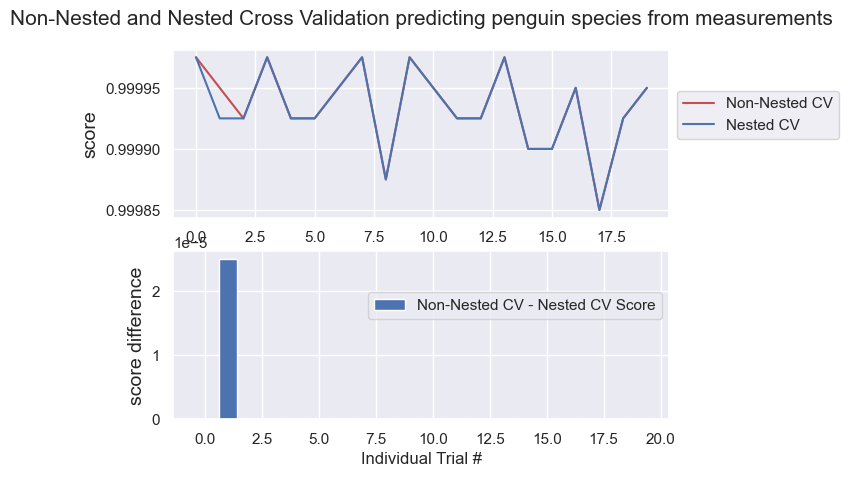

In [184]:
#NOT A MODEL JUST COMPARING TWO DIFFERENT MODELS TO SEE WHICH INE IS BETTER

# this code is from sklearn docs
# 20x it does both a non-nested and a nested cross val on the same data
# the two techniques are compared in their average error across the 20x loop


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt

# Number of random trials
NUM_TRIALS = 20


# Set up possible values of parameters to optimize over
# this is a regularization parameter, smaller C => more regularization
p_grid = {"classifier__C": [1, 10, 100,  1000]}


# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=pipe, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_res, y_res)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(1, 0, 0, .8)) #(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation predicting penguin species from measurements",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(1, 0, 0, .8))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [ ]:
#now we will do this for svm

In [185]:
'''
We also need to explain why we choose svc rather than svm's other classifiers in sklearn


'classifier__C': np.logspace(-4, 4, 9), <- just the usual C value stuff
               'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'], <-
        'linear': This kernel is a linear transformation that maps the data to a higher-dimensional 
        space using a linear function. It is suitable for linearly separable datasets and works well 
        when there are many features. The 'linear' kernel is computationally efficient and is less prone
        to overfitting than other kernels. However, it may not work well on nonlinear datasets.

        'rbf' (Radial basis function): This kernel is a popular choice for nonlinear datasets. 
        It maps the data to a high-dimensional feature space using a Gaussian function. 
        It can capture complex relationships between features and is very flexible. 
        However, the 'rbf' kernel can be sensitive to the choice of hyperparameters, such as the 
        width of the Gaussian function, and can overfit when the number of features is large.

        'sigmoid': This kernel maps the data to a high-dimensional feature space using a sigmoid 
        function. It is suitable for problems that require a logistic function as a decision function.
        However, the 'sigmoid' kernel is less popular than the other kernels and may not perform as 
        well on many datasets.

        'poly' (Polynomial): This kernel maps the data to a high-dimensional feature space using 
        a polynomial function. It is suitable for datasets with nonlinear relationships between 
        features. However, the 'poly' kernel can be sensitive to the degree of the polynomial 
        and can overfit when the degree is too high. <- was the best before i had to refit the data not sure whats happening
        rn
               
               
               
               
               
            'classifier__gamma': ['scale', 'auto', 0.1, 1, 10] <-Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features

if float, must be non-negative.









'''







from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])


# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', SVC())])

# Create search space of hyperparameters
# the variable namespace looks like this
# pipe.classifier.C is represented as 'classifier__C'
# if we'd just chucked a LogisticRegression() in as the model
# instead of a pipe, then we'd only have had 'C' w/o the 'classifier__' bit 
search_space = {'classifier__C': np.logspace(-4, 4, 9),
               'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
               'classifier__gamma': ['scale', 'auto', 0.1, 1, 10]}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs=-1) #idk why the verbose isnt showing for me anymore
#it just runs


In [187]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways

#_-----------------------------------------------------------------------------------
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, 
                                                    #test_size=0.2, random_state=101)

#_------------------------------------------------------------------------------------
# Fit grid search


best_model.fit(X_res, y_res)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('zscore',
                                                                         StandardScaler(),
                                                                         ['Applicant_Age',
                                                                          'Owned_Realty',
                                                                          'Total_Children',
                                                                          'Owned_Car',
                                                                          'Total_Income',
                                                 

In [188]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({'classifier__C': 10.0,
  'classifier__gamma': 'scale',
  'classifier__kernel': 'linear'},
 1.0)

In [ ]:
#NOT A MODEL JUST COMPARING TWO DIFFERENT MODELS TO SEE WHICH INE IS BETTER

# this code is from sklearn docs
# 20x it does both a non-nested and a nested cross val on the same data
# the two techniques are compared in their average error across the 20x loop


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt

# Number of random trials
NUM_TRIALS = 20


# Set up possible values of parameters to optimize over
# this is a regularization parameter, smaller C => more regularization
p_grid = {"classifier__C": [1, 10, 100,  1000]}


# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=pipe, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_res, y_res)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_res, y=y_res, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(1, 0, 0, .8)) #(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation predicting penguin species from measurements",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(1, 0, 0, .8))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [ ]:
#############
#next is decision tree 

In [189]:
'''
For classifier__criterion: 
'gini' index: The Gini index measures the impurity of a node in a decision tree. 
It is a measure of the probability of misclassifying a randomly chosen element from the set. 
A lower Gini index indicates a better split. The advantages of using the Gini index are that 
it is computationally efficient and works well with categorical and continuous data. However, 
the Gini index may not perform well when the classes are imbalanced.

'entropy' criterion: The entropy criterion measures the impurity of a node by calculating the
entropy of the class distribution. A lower entropy indicates a better split. 
The advantages of using the entropy criterion are that it is computationally efficient and 
works well with categorical and continuous data. The entropy criterion is also more sensitive to 
changes in class probabilities than the Gini index. However, like the Gini index, the entropy criterion 
may not perform well when the classes are imbalanced. 

#our data was imbalanced originally and we attempted to fix that by oversampling using smote technique

'log_loss' criterion: The log loss criterion is a measure of the error rate of a decision tree. 
It is based on the logistic loss function and is commonly used in logistic regression. 
A lower log loss indicates a better split. The advantages of using the log loss criterion 
are that it can handle imbalanced classes and is less prone to overfitting than the Gini index 
or entropy criterion. However, the log loss criterion is computationally more expensive and may 
not work well with categorical data.  #before oversampling this would have been a very good model


In summary, the choice of criterion depends on the specific problem and the available data. 
The Gini index and entropy criterion are computationally efficient and work well with categorical 
and continuous data. The log loss criterion can handle imbalanced classes and is less prone to overfitting 
but is computationally more expensive and may not work well with categorical data.




For depth: None allows it to fit as much as it wants and the less the simpler the model (e.g. 2) and the more
(e.g. 10) the more complex and prone to overfitting



for min samples split: the smaller more splits and deeper the tree is allowed to be (prone to overfitting and more complex)
and the larger the splits teh shallower and less splits allowed so (prone to underfitting and less complex)




For min_samples_leaf: same as above for split

'''

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])

# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', DecisionTreeClassifier())])

# Create search space of hyperparameters
search_space = {'classifier__criterion': ['gini', 'entropy', 'log_loss'],
                'classifier__max_depth': [None, 2, 5, 10, 20],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_samples_leaf': [1, 2, 4]}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs=-1) #njobs = -1 makes it faster

In [190]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search

%timeit

best_model.fit(X_res, y_res)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-package

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('zscore',
                                                                         StandardScaler(),
                                                                         ['Applicant_Age',
                                                                          'Owned_Realty',
                                                                          'Total_Children',
                                                                          'Owned_Car',
                                                                          'Total_Income',
                                                 

In [191]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({'classifier__criterion': 'entropy',
  'classifier__max_depth': 10,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 10},
 0.999800021872266)

In [ ]:
#################################
#next is naive bayes whihch doenst have any hyperparameters to tune


In [192]:
'''
Naive bayes has no hyperparameter so just explain naive bayes itself
'''


# Import necessary modules
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', GaussianNB())
])

# Create search space of hyperparameters
search_space = {}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)

In [193]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('zscore',
                                                                         StandardScaler(),
                                                                         ['Applicant_Age',
                                                                          'Owned_Realty',
                                                                          'Total_Children',
                                                                          'Owned_Car',
                                                                          'Total_Income',
                                                 

In [194]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({}, 0.9106838707661542)

In [195]:
############################################
# next is knn 


In [39]:
'''

the number of neighbhors the more the neighbhors the more the 

the weights are quite literally that uniform is just 1/n and distance values the closer the neighbors 
the more value it willhave

finally the algorithms: 
'auto': This is the default algorithm, which selects the most appropriate algorithm 
based on the characteristics of the data. It is a good choice for most datasets.

Pros:

Automatic selection of the best algorithm based on the input data.
Suitable for most datasets.
Cons:

None.


'ball_tree': This algorithm constructs a ball tree data structure to find the nearest 
neighbors. It is a good choice when the number of features is large compared to the number of samples. #not good for ours

Pros:

Efficient for high-dimensional datasets.
Can be faster than brute force algorithm for some datasets.
Cons:

Slower than brute force algorithm for low-dimensional datasets. Memory-intensive.


'kd_tree': This algorithm constructs a kd-tree data structure to find the nearest neighbors. 
It is a good choice when the number of features is small compared to the number of samples. #good for ours

Pros:

Efficient for low-dimensional datasets.
Can be faster than brute force algorithm for some datasets.
Cons:

Slower than brute force algorithm for high-dimensional datasets.
Memory-intensive.


'brute': This algorithm computes the distances between all pairs of points in the dataset to find the nearest
neighbors. It is a good choice for small datasets. #ok for ours i think kd-tree is better

Pros:

Simple and easy to understand.
Suitable for small datasets.
Cons:

Slow and inefficient for large datasets. Memory-intensive.

In general, the choice of algorithm depends on the size and characteristics of the dataset. 
If the number of features is large, ball tree algorithm may be a good choice, whereas if the number of samples is small and the number of features is low, kd-tree algorithm may be a good choice. If the dataset is small, brute force algorithm may be a good choice. The auto option can be a good





'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [ ]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

In [ ]:
###############################
#next is kernel ridge regression


In [21]:
'''

We covered the kernel values here 

the gamma value  determines the inverse of the width of the kernel function, 
which in turn affects the degree of smoothing of the resulting regression function.

The 'scale' value of the regressor__gamma hyperparameter specifies 
that gamma should be set to 1 / (n_features * X.var()), where n_features is 
the number of features in the input data X. This is equivalent to scaling each feature 
to have unit variance before computing gamma.

The 'auto' value of regressor__gamma specifies that gamma should be set to 1 / n_features. 
This is equivalent to using the median of the distances between all pairs of points in the 
input data X to set the scale of the kernel function.

Finally the alpha value a lower value like 0.001 means weak regularization and more complex model
with greater overfittign and vice versa for values like a 1000
'''

from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('regressor', KernelRidge())
])

# Create search space of hyperparameters
search_space = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf', 'polynomial'],
    'regressor__gamma': ['scale', 'auto']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search

best_model.fit(X_res, y_res)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
88 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\kernel_ridge.py", line 197, in fit
    K = self._get_kernel(X)
  File "C:\Users\User\anaconda3\lib\site-

In [ ]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

#this method doesnt run well since it takes up too much ram about 7.5 gb of ram and thus isnt possible to do with our systems

In [ ]:
############################################
#only thing left are the ensemble methods ---Random Forest, Adaboost, Gradient

In [ ]:
#################################################
### Next is Adaaptive Gradient boost Ensemble Technique also known as adaboost

In [22]:
'''

n_estimators is the max number of estimators (weak learners) the value is capped at in this case and higher number is more 
complex (like 200) and lower is less and 50 is the default value

learning rate is teh step size and lower is more complex and prone to overfitting and higher isnt


the algorithms are used to calculate the weights for each of the weak learners in the ensemble.

'SAMME' stands for Stagewise Additive Modeling using a Multi-class Exponential loss function. 
This algorithm works well for binary classification problems, but can also be extended to multiclass problems.
'SAMME.R' is a variant of the SAMME algorithm that uses real-valued predictions 
from the weak learners and can often converge faster than the original SAMME algorithm.
In general, 'SAMME.R' tends to perform better than 'SAMME' for most cases, but the 
optimal choice may depend on the specific problem being solved.

#both of the algorithms seem reasonable to me


'''

from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 1, 10],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [24]:
%%timeit
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
2min 5s ± 504 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({'classifier__algorithm': 'SAMME.R',
  'classifier__learning_rate': 1,
  'classifier__n_estimators': 150},
 0.9997000374953131)

In [ ]:
############################
## Next is Gradient Tree Boosting

In [30]:
'''


estimators and learning rate i covered above
and since its a tree we know what the depth, leaves, and split  means as well
only the max features are left:

The max_features parameter in gradient tree boosting determines the maximum number of 
features to consider when looking for the best split at each node. Here are some pros 
and cons of using different options for this parameter:

Pros of 'auto':

Default value for this parameter
Results in a good balance between bias and variance
Can help avoid overfitting by limiting the number of features considered
Cons of 'auto':

May not always select the most informative features
May result in a slightly higher bias than other options
Pros of 'sqrt':

Generally results in a lower bias than 'auto'
Limits the number of features considered, helping to avoid overfitting
Cons of 'sqrt':

May not always select the most informative features
May result in a slightly higher variance than 'auto'
Pros of 'log2':

Similar to 'sqrt', but may result in an even lower bias
Limits the number of features considered, helping to avoid overfitting
Cons of 'log2':

May not always select the most informative features
May result in a slightly higher variance than 'auto' or 'sqrt'
Overall, the choice of max_features depends on the specific problem and dataset
being analyzed. In general, it is a good idea to try out multiple options
and see which one performs best through cross-validation.



'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 1, 10],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [31]:
%%timeit

#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search

best_model.fit(X_res, y_res)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
1h 51min 43s ± 4min 32s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({'classifier__learning_rate': 0.1,
  'classifier__max_depth': 5,
  'classifier__max_features': 'auto',
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 5,
  'classifier__n_estimators': 150},
 0.9999000124984377)

In [33]:
########################################
###Next is the random forest

In [36]:
'''
all the hyper parameters were covered just compare random forest to the other two boosting methods

'''


from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [37]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('zscore',
                                                                         StandardScaler(),
                                                                         ['Applicant_Age',
                                                                          'Owned_Realty',
                                                                          'Total_Children',
                                                                          'Owned_Car',
                                                                          'Total_Income',
                                                 

In [38]:
#THIS IS OUR BEST MODEL 
#IT HAS C = 1, PENALTY = L2, ACCUARACY SCORE OF 67.94%--> improved to 68.6% according to above 
#USING CROSS VALIDATION 


# hay our best model has these params, and it turns out its cross validation score was perfect!
# note how sklearn does this... once it determines the best version of the classifier
# it refits those parameters on ALL of `X_train`... 
# in other worsds it doesn't just leave the last cross validaiton fold version hanging around :)
best_model.best_params_, best_model.best_score_

({'classifier__criterion': 'entropy',
  'classifier__max_depth': None,
  'classifier__max_features': 'auto',
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 2,
  'classifier__n_estimators': 100},
 0.9996000499937508)

In [ ]:


##I didnt do it cuz i didnt want to interrupt the running code but it would have been ideal to add all these values to a 
## a list or something for reference but I didnt so just have to look here for the code



In [ ]:
#NO CODE BELOW THIS IS NEEDED - DELETE

In [ ]:
'''

Wanna make a quick note that we use classification over all the regression method ssince regression is for continuous values
Classification works better in our case of approve or not

'''

# Proposed Solution

Our proposed solution to predicting whether individuals get approved for a credit card and understanding what variables play a role in making that decision is to use classifiers based on the techniques we’ve learnt in class. 
First, we will use k-fold validation to determine our model of choice by validating over logistic classifiers/ regression, naive Bayes, Linear SVM, kernel ridge regression with l1, l2, and elastic net penalty. We will choose the model that gives us the highest accuracy score. 
We are using K-fold validation since with the train-validation-test model split we always run the issue of overfitting on the training data. K-fold validation instead trains and evaluates on all available data by splitting the data amongst each fold training on that and testing on the rest. 
We are using logistic classifiers/ regression, naive Bayes, Linear SVM, and kernel ridge regression since they are machine learning classifiers. Our proposed problem is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. This is a yes or no question which makes it a binary classification task. As a result, it makes a lot of sense to use machine learning classification algorithms that can also be used to solve binary classification problems like the algorithms above. We are using these specific algorithms since we are familiar with these algorithms and understand how to run and evaluate them effectively. Furthermore, we use L1, L2, and elasticnet penalty on kernel ridge regression since these are regularization terms that will curb overfitting and make generalization better. 
With the chosen model we will validate across parameters. In the case of logistic regression, we will validate over the values of C = [0.01, 0.1, 1, 10, 100] to find our best model. 
For Naive Bayes, we will validate over Gaussian Naive Bayes and Multinomial Naive Bayes and choose our alpha from the following values - [0.01,0.05, 0.1, 0.2, 0.25].
For Linear SVM, we will validate over different kernel functions - 'linear', 'poly', 'rbf', and 'sigmoid' and we will choose over values of C = [0.01, 0.1, 1, 10, 100] to find the best model. 
For Kernel Ridge, we will validate over the following values of alpha - [0.01, 0.1, 1.0, 10.0, 100.0], the kernel functions of linear, polynomial, and RBF and related kernel-specific parameters.
Our extensive search over the models and their parameters will make our classification model accurate. As our dataset is not super large, we are not as concerned about computational efficiency - something to improve on while expanding on the project. 
We will finally train our model and test it to see its accuracy and compare it to existing models available on Kaggle to compare our performance. We will set up a confusion matrix to see how the model fares and plot the ROC/AUC. 


# Evaluation Metrics

We will use both precision and recall metrics to evaluate our model as both false negatives and false positives are of significant concern to our model. A credit card company would need to maximize eligible customers to increase revenue by minimizing the number of false negatives and also would need to minimize the number of individuals who may default to cut losses hence minimizing the false positives. Since neither one of the metrics is more important to our model, we will additionally use the f1 score which incorporates both precision and recall to finally measure the performance of our model. 


# Preliminary results


This dataset is extremely suited for this problem since it has a column which is Status which tells based on the previous columns whether or not the credit card request was approved. This was also a dataset of over 10,000 datapoints which is good for our algorithm. We explained the reasoning for our algorithms in another section and our baseline is if its greater than the mean than we accept it. This is our baseline of baselines. Afterwards we will do do k-fold and use that as the baseline to test our hyperparameters and parameters in order to select the best models. 

In [ ]:
#next is making all columns which arent numerical numerical
#first we will check "which columns arent numerical
credit.dtypes

In [ ]:
#credit = credit.drop(columns = ['Applicant_Gender', 'Housing_Type', 'Education_Type','Family_Status'])
credit

In [ ]:
#from the above we see that Applicant_Gender , Housing_Type , Education_Type , Family_Status
#check the unique values for applicant_gender
credit['Applicant_Gender'].unique()
#from below we see that its male or female

In [ ]:
#credit['Applicant_Gender'] = credit['Applicant_Gender'] == 'M'

In [ ]:
credit['Applicant_Gender'] = credit['Applicant_Gender'].replace('M      ',1)
credit['Applicant_Gender'] = credit['Applicant_Gender'].replace('F      ',0)
credit

In [ ]:
credit.head()

In [ ]:
def one_hot_encode(x:np.ndarray):
    # your code here
    uniqueValues = np.unique(x) #so the unique is not the same each time which can cause the names of the columns to be
    #incorrect so we will first sort it
    numUnique = len(np.unique(x))
    #print(sizeOfArrays)
    #print(type(uniqueValues))
    #oneHot = np.zeros((numUnique, len(x)))
    oneHot = np.zeros((len(x), numUnique))
    #print(uniqueValues)
    i = 0
    for val in x:
        oneHot[i][np.where(uniqueValues == val)[0][0]] = 1
        i += 1
    #print(oneHot)
    return uniqueValues, oneHot;

In [ ]:
#housing one hot encoding
housing = credit['Housing_Type']
housing = np.array(list(housing))
housing
print(type(housing))


In [ ]:
namesForOneHotHousing, oneHotHousing = one_hot_encode(housing)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotHousing)
print(oneHotHousing)
print(oneHotHousing.shape)

In [ ]:
sum(oneHotHousing[:,1])
print(sum((oneHotHousing))) #just shows how many in each category

In [ ]:
#namesForOneHotHousing = credit['Housing_Type'].unique()
print(namesForOneHotHousing[0])
for i in range(oneHotHousing.shape[1]):
    credit[namesForOneHotHousing[i]] = oneHotHousing[:,i]

In [ ]:
credit.head()

In [ ]:
#okay next is education type
#education one hot encoding
education = credit['Education_Type']
education = np.array(list(education))
education
print(type(education))


In [ ]:
namesForOneHotEducation, oneHotEducation = one_hot_encode(education)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotEducation)
print(oneHotEducation)
print(oneHotEducation.shape)

In [ ]:
sum(oneHotEducation[:,1])
print(sum((oneHotEducation))) #just shows how many in each category
print(sum(sum(oneHotEducation)))

In [ ]:
print(namesForOneHotEducation[0])
for i in range(oneHotEducation.shape[1]):
    credit[namesForOneHotEducation[i]] = oneHotEducation[:,i]
credit.head()

In [ ]:
#next is family status
family = credit['Family_Status']
family = np.array(list(family))
family
print(type(family))

In [ ]:
namesForOneHotFamily, oneHotFamily = one_hot_encode(family)
#oneHotHousing = arrHouse[:]
#namesForOneHotHousing = arrHouse[0]
print(namesForOneHotFamily)
print(oneHotFamily)
print(oneHotFamily.shape)

In [ ]:
sum(oneHotFamily[:,1])
print(sum((oneHotFamily))) #just shows how many in each category
print(sum(sum(oneHotFamily)))

In [ ]:
#next is Family_Status
credit['Family_Status'].unique()

In [ ]:
print(namesForOneHotFamily[0])
for i in range(oneHotFamily.shape[1]):
    credit[namesForOneHotFamily[i]] = oneHotFamily[:,i]
credit.head()

In [ ]:
credit.shape

In [ ]:
credit['Education_Type'].unique()

In [ ]:
credit = credit.drop(columns=['Education_Type','Family_Status','Housing_Type'])

In [ ]:
credit['Applicant_Gender'].unique()

In [ ]:
credit.dtypes

In [ ]:
credit.head()

In [ ]:
#credit.shape()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
 #now we are done one hot encoding everything

In [ ]:
#!pip install imblearn
#!pip install sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1),
                                                    credit['Status'],
                                                    test_size=0.2,
                                                    random_state=123)

# Define column transformer for categorical features
categorical_features = ['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Income_Type',
                     'Owned_Mobile_Phone',
                        'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title']

preprocessor = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical_features))

# Define ADASYN pipeline with random forest classifier
pipeline = make_pipeline(preprocessor, ADASYN(random_state=123), RandomForestClassifier(random_state=123))
#pipeline = make_pipeline(ADASYN(random_state=123))

# Fit pipeline to training data
pipeline.fit(X_train, y_train)
#

In [ ]:
#next is visualization
credit.head()
X_train.shape

In [ ]:
#Base Model is  just if the income is better than the mean than approve otherwise don't


#train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size=0.2)

In [ ]:
print(train.shape)
train.head()


In [ ]:
print(test.shape)
test.head()

In [ ]:
train_income_mean = train['Total_Income'].mean()
print(train_income_mean)

In [ ]:
gThanM = [1 if i >= train_income_mean else 0 for i in train['Total_Income']]

In [ ]:
train['prediction'] = gThanM

In [ ]:
train.head()

In [ ]:
y_true_num = list(train['Status'])
y_pred_num = list(train['prediction'])
#print(y_pred_num)

In [ ]:
fp = 0
tp = 0
fn = 0
tn = 0

tpPoints = []
xTp = []
fpPoints = []
xFp = []
fnPoints = []
xFn = []
tnPoints = []
xTn = []

for i in range (len(y_true_num)):
    if y_true_num[i] == 1 and y_pred_num[i] == 1:
        tp += 1
        tpPoints.append(credit['Total_Income'].iloc[i])
        xTp.append(i)
        #tpPoints.append(credits['Total_Income'][i]) #fix this doesnt make sense
    if y_true_num[i] == 0 and y_pred_num[i] == 1:
        fp += 1
        fpPoints.append(credit['Total_Income'].iloc[i])
        xFp.append(i)
        #fpPoints.append(y_true_)
    if y_true_num[i] == 1 and y_pred_num[i] == 0:
        fn += 1
        fnPoints.append(credit['Total_Income'].iloc[i])
        xFn.append(i)
    if y_true_num[i] == 0 and y_pred_num[i] == 0:
        tn += 1
        tnPoints.append(credit['Total_Income'].iloc[i])
        xTn.append(i)
        

precision = float (tp) / float(tp + fp)
recall = float(tp) / float(tp + fn)
        #precision1 = precision_score(y_true_num, y_pred_num)
        #print(precision1)
        #print(precision)
#precise[j] = precision
    #j += 1
print("Precision: ", precision)
print()
print("Recall: ", recall)
print()
print("False Positive: ", fp)
print()
print("False Negative: ", fn)
print()
f1 = 2*precision *recall / (precision + recall)
print("F1 Score: ", f1)

An extrememly low f1 score indicates the baseline isnt great which is what we are aiming for but its a start and what we should beat at the very least

In [ ]:
#Next comes the graph for this
plt.scatter(xTp, tpPoints, color = 'green', label="True Positive")
plt.scatter(xFp, fpPoints, color = 'yellow', label="False Positive")
plt.scatter(xFn, fnPoints, color = 'blue', label = "False Negatives")
plt.scatter(xTn, tnPoints, color = 'red', label = "True Negatives")
plt.legend(["True Positive" , "False Positive", "False Negative", "True Negative"], ncol = 4 )
plt.figure(figsize=(10000,10000))
#plt.show()

In [ ]:
#for our graphs we can use an ROC Curve to evaluate since we are doing a binary classification task
#it make sense to compare the tpr to the fpr as the roc curve does


#same with doing any of the validation methods like kfold validation or gridsearch their methods only work on methods which
#use some sort of classifier

# Ethics & Privacy

We referenced the ethics checklist at https://deon.drivendata.org. We have no knowledge of the data collection process since we are using a publicly available dataset at Kaggle, however, we do know that no names are part of the dataset since each applicant was identified by their  ID which protects them. One of the ethical issues with this data is that some information such as the name and date of birth can be identifiable,even though this data set has omitted such private information by using unidentifiable id numbers and age instead of the date of birth.  We haven’t gotten towards the modeling or the deployment therefore we can’t answer the ethics of these two yet. However, basing off of our base model we see that false negatives are a large ethical concern for us as many individuals are considered ineligible by just comparing income. Making our model robust with other economic and credit-worthy factors such as car and home ownership as well as number of family members can help predict individuals who can pay off credit debt more accurately. This ethical corncern will get addressed once a more robust and complex model is in place which takes many factors into account. We will continue to monitor this concern within our model by tracking false positivity rates more closely. Additionally, one confounding variable that could impact our data is race. This variable could possibly be biasing our data, however this variable is not tracked within our dataset hence it is difficult to evaluate whether it is biasing our data and hence biaisng our model. This can be resolved if our model is implemented and trained on data which tracks racial characteristics to further understand the bias.


# Team Expectations 

- *We will communicate multiple times a week through our messages groupchat to collaborate on the project components.*
- *We have set aside weekly meetings to work together in person and online via Zoom.* 
- *We expect to split all components equally and have multiple people working on different sections of the project to have the best output.*



# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/19  |  6 PM |  Brainstorm topics/questions. Everyone brought different project ideas to the meeting.  | Discussed different project ideas; Finalized topic for the project;  discuss hypothesis; began background research | 
| 2/20  |  N/A |  Found background information. |Presented the background information we found. | 
| 2/21  | 6 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part; Figured out timeline to work for the project |
| 2/28  | 6 PM  | Import & Wrangle Data, do  EDA |Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 3/1  | 6 PM  | Finalize wrangling/EDA; Begin programming for project |Discuss/edit project code; Complete project |
| 3/13  | NA  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Hemkiran, S., et al. “Design of Automatic Credit Card Approval System Using Machine Learning.” SpringerLink, Springer Singapore, 1 Jan. 1970, https://link.springer.com/chapter/10.1007/978-981-16-6448-9_1. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Kibria, Golam, and Mehmet Sevkli. “Application of Deep Learning for Credit Card Approval: A Comparison ...” Application of Deep Learning for Credit Card Approval: A Comparison with Two Machine Learning Techniques, https://www.researchgate.net/profile/Md-Kibria-12/publication/348755769_Application_of_Deep_Learning_for_Credit_Card_Approval_A_Comparison_with_Two_Machine_Learning_Techniques/links/600f495f92851c13fe39bb38/Application-of-Deep-Learning-for-Credit-Card-Approval-A-Comparison-with-Two-Machine-Learning-Techniques.pdf?origin=publication_detail. <br>
<a name="sotanote"></a>3.[^](#sota):Markova, Maya. “Credit Card Approval Model: An Application of Deep Neural Networks.” AIP Publishing, AIP Publishing LLC AIP Publishing, 24 Feb. 2021, https://aip.scitation.org/doi/abs/10.1063/5.0040744?journalCode=apc. 
